# Using CNN's with the Cats vs Dogs Dataset

Using the famous `Cats vs Dogs` dataset to train a model that can classify images of dogs from images of cats. For this, I am going to use Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities.

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [1]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-03-26 10:56:45--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.115.40.139, 2a02:26f0:f3:586::e59, 2a02:26f0:f3:58c::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.115.40.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  5.05MB/s    in 4m 27s  

2022-03-26 11:01:13 (2.94 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



NameError: name 'zipfile' is not defined

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


A directory for cats-v-dogs is needed, and subdirectories for training
and testing. These in turn will need subdirectories for 'cats' and 'dogs'.

In [5]:
# os.listdir(DIRECTORY) returns a list with the contents of that directory.
# os.path.getsize(PATH) returns the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

# Define root directory
root_dir = '/tmp/cats-v-dogs'

sub_dir_training = "training"
sub_dir_training_cats = "cats"
sub_dir_training_dogs = "dogs"

sub_dir_testing = "testing"
sub_dir_testing_cats = "cats"
sub_dir_testing_dogs = "dogs"
# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
else:
  os.makedirs(os.path.join(root_dir))
# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  try:
      os.makedirs(os.path.join(root_dir, sub_dir_training))
      os.makedirs(os.path.join(root_dir, sub_dir_training, sub_dir_training_cats))
      os.makedirs(os.path.join(root_dir, sub_dir_training, sub_dir_training_dogs))
      os.makedirs(os.path.join(root_dir, sub_dir_testing))
      os.makedirs(os.path.join(root_dir, sub_dir_testing, sub_dir_testing_cats))
      os.makedirs(os.path.join(root_dir, sub_dir_testing, sub_dir_testing_dogs))
  except:
      print('There are somme issue here')
  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/testing/cats


In [7]:
# - SOURCE: directory containing the files
# - TRAINING: directory that a portion of the files will be copied to
# - TESTING: directory that a portion of the files will be copied to
# - SPLIT SIZE: to determine the portion

# The files should be randomized, so that the training set is a random sample of the files, and the test set is made up of the remaining files.
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  all_files = []
  for file_name in os.listdir(SOURCE):
      file_path = SOURCE + file_name

      if os.path.getsize(file_path):
          all_files.append(file_name)
      else:
          print('{} is zero length, so ignoring'.format(file_name))
  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  shuffled = random.sample(all_files, n_files)
  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]
  for file_name in train_set:
      copyfile(SOURCE + file_name, TRAINING + file_name)
  for file_name in test_set:
      copyfile(SOURCE + file_name, TESTING + file_name)

In [8]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


Generators will yield batches of images, both for training and validation. 

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. 

In [9]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [10]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Last step: To define the architecture of the model that will be trained.

In [12]:
# GRADED FUNCTION: create_model
from tensorflow.keras.optimizers import RMSprop
def create_model():
  # A KERAS MODEL TO CLASSIFY CATS V DOGS
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])
  model.compile(
        optimizer = RMSprop(learning_rate=0.001),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )
  return model

In [13]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
136/352 [==========>...................] - ETA: 49s - loss: 0.7234 - accuracy: 0.5993

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 [==============================] - 103s 260ms/step - loss: 0.6283 - accuracy: 0.6622 - val_loss: 0.5409 - val_accuracy: 0.7180
Epoch 2/15
352/352 [==============================] - 91s 259ms/step - loss: 0.4850 - accuracy: 0.7670 - val_loss: 0.4813 - val_accuracy: 0.7612
Epoch 3/15
352/352 [==============================] - 91s 258ms/step - loss: 0.4165 - accuracy: 0.8074 - val_loss: 0.4329 - val_accuracy: 0.8080
Epoch 4/15
352/352 [==============================] - 90s 256ms/step - loss: 0.3526 - accuracy: 0.8449 - val_loss: 0.4246 - val_accuracy: 0.8060
Epoch 5/15
352/352 [==============================] - 91s 259ms/step - loss: 0.2884 - accuracy: 0.8791 - val_loss: 0.4792 - val_accuracy: 0.8052
Epoch 6/15
352/352 [==============================] - 91s 259ms/step - loss: 0.2191 - accuracy: 0.9111 - val_loss: 0.5210 - val_accuracy: 0.8140
Epoch 7/15
352/352 [==============================] - 91s 259ms/step - loss: 0.1526 - accuracy: 0.9425 - val_loss: 0.5163 - val_accuracy: 0.

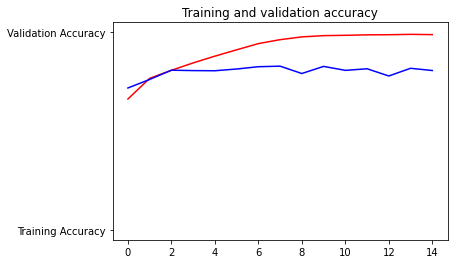

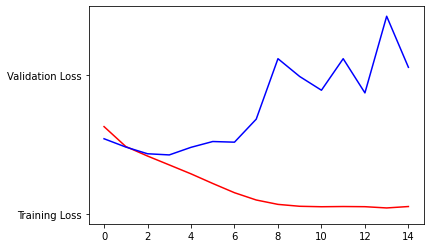

In [14]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [15]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>